In [15]:
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, classic_sta_lta_py
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan = 'GHZ'

#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]

statlist = ['A04']
day = 15
hr = 13

In [4]:
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')

In [5]:
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))

In [ ]:
#stream.detrend('demean')

In [6]:
stream.normalize()

1 Trace(s) in Stream:
7F.A04..BHZ | 2020-01-15T00:00:00.000000Z - 2020-01-15T23:59:59.999000Z | 1000.0 Hz, 86400000 samples

In [7]:
stream_snapshot = stream.slice(starttime=start_time+hr*3600,endtime=start_time+(hr+1)*3600)

In [8]:
stream_z = stream_snapshot.select(component="Z")

In [9]:
tr = stream_z[0]

In [ ]:
#print(tr.stats)

In [ ]:
#tr.plot(type = "relative")

In [10]:
tr_filt = tr.copy()

In [11]:
tr_filt.filter('highpass', corners=4, freq=1, zerophase=True)

7F.A04..BHZ | 2020-01-15T13:00:00.000000Z - 2020-01-15T14:00:00.000000Z | 1000.0 Hz, 3600001 samples

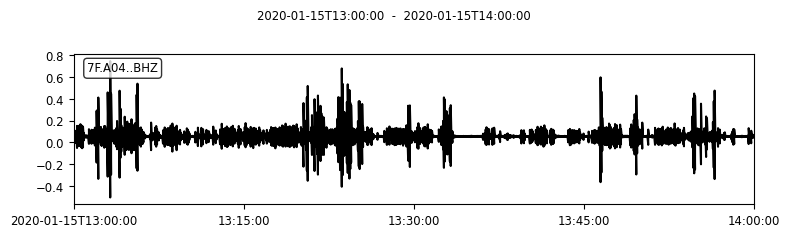

In [12]:
z = stream_z.plot()

In [13]:
df = tr_filt.stats.sampling_rate
#print("HERTZ: ",df)
#nsta = 0.5 #df/20
#nlta = 10   #df/5

In [20]:
cft = classic_sta_lta(tr_filt.data, nsta=int(1*df), nlta=int(10*df))

In [22]:
cft_py = classic_sta_lta_py(tr_filt.data, nsta=int(1*df), nlta=int(10*df))

In [23]:
rec_cft = recursive_sta_lta(tr_filt.data, nsta=int(1*df), nlta=int(10*df))

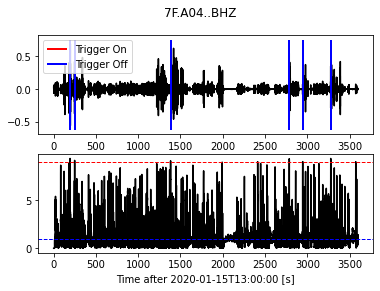

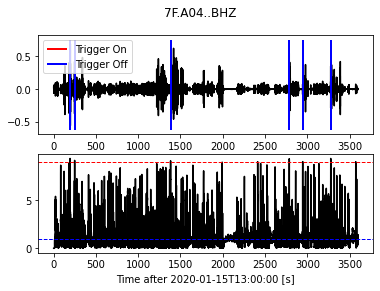

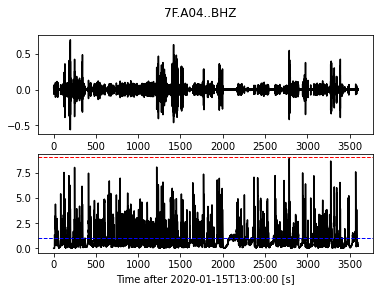

In [24]:
thr_on = 9
thr_off = 1
plot_trigger(tr_filt, cft, thr_on, thr_off)
plot_trigger(tr_filt, cft_py, thr_on, thr_off)
plot_trigger(tr_filt, rec_cft, thr_on, thr_off)

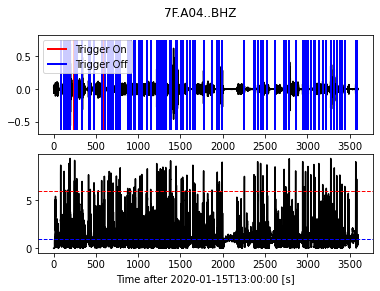

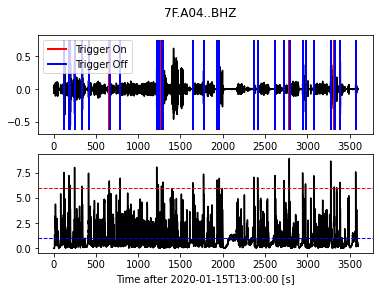

In [19]:
thr_on = 6
thr_off = 1
plot_trigger(tr_filt, cft, thr_on, thr_off)
plot_trigger(tr_filt, rec_cft, thr_on, thr_off)

In [ ]:
thr_on = 5
thr_off = 1
plot_trigger(tr_filt, cft, thr_on, thr_off)
plot_trigger(tr_filt, rec_cft, thr_on, thr_off)

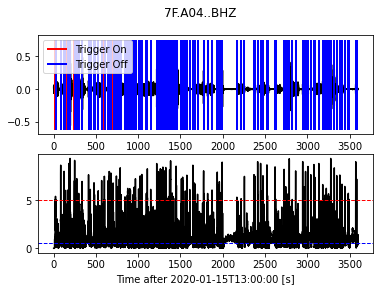

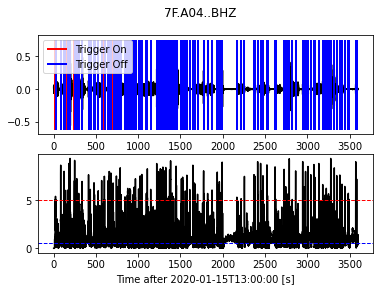

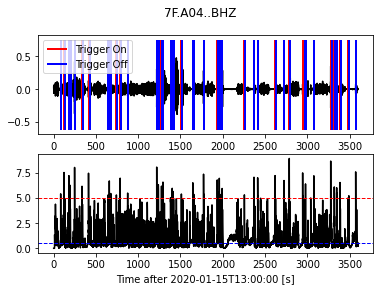

In [25]:
thr_on = 5
thr_off = 0.5
plot_trigger(tr_filt, cft, thr_on, thr_off)
plot_trigger(tr_filt, cft_py, thr_on, thr_off)
plot_trigger(tr_filt, rec_cft, thr_on, thr_off)

In [ ]:
#trig = coincidence_trigger("classicstalta", thr_on = 1.5, thr_off = 1, stream = tr_filt, thr_coincidence_sum=1,sta=int(1*df), lta=int(10*df))

In [ ]:
plot_trigger(tr_filt, cft, 3, 2)